# Numerical Methods
## Lecture 7: Monte Carlo simulations cont.
by: [Tomasz Romańczukiewicz](mailto:trom@th.if.uj.edu.pl)

*********************************************************

### Outline
- simplified market models (additive, multiplicative, exponential)
- correlated series
- heteroscadicity
- agents models (wealth distribution example)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import checkdep_usetex 
import shutil #https://stackoverflow.com/a/75478997
%matplotlib inline  
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['text.usetex']= True if shutil.which('latex') else False
plt.rcParams['axes.grid'] = True
#plt.rcParams.keys()

In [2]:
def additive_model(time_steps=1000, agents=100):
    mu, sigma = 0, 0.02
    r = np.random.normal(mu, sigma, size=(time_steps, agents))
    r = 1+r.cumsum(axis=0)
    return r

def make_plots(r):    
    s = r.shape
    t = np.arange(s[0])
    plt.subplot(2,2,1)
    plt.plot(t, r)
    plt.subplot(2,2,2)
    plt.hist(r[-1, :], bins=20)

    dr = np.diff(r[:,0])
    plt.subplot(2,2,3)
    plt.plot(t[1:], dr, color='red')
    plt.subplot(2,2,4)
    plt.hist(dr, bins=20, color='green')

## Market models:
1. Additive model

$$y_t = y_{t-1}+\epsilon_t$$

- prices can go negative
- volatility does not depend on the value (homoscedastic)


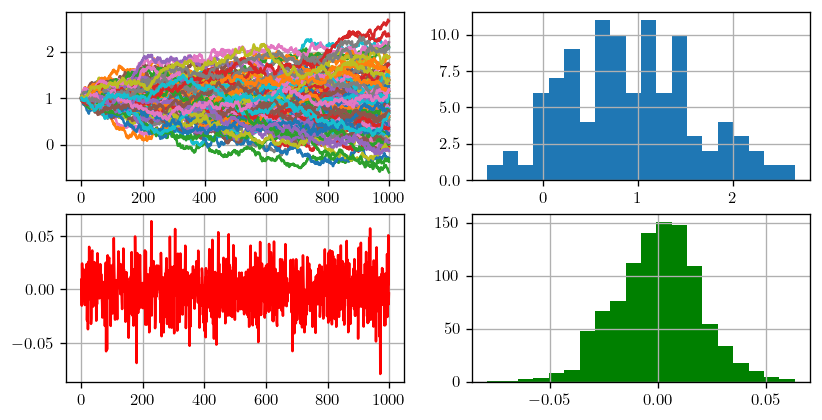

In [3]:
r = additive_model()    
make_plots(r)

In [4]:
def multiplicative_model(time_steps=1000, agents=100):
    mu, sigma = 0, 0.02
    r = (1+np.random.normal(mu, sigma, size=(time_steps, agents)))
    r[0,:]=1
    r = r.cumprod(axis=0)
    return r


2.  Multiplicative model

$$y_t = y_{t-1}(1+\epsilon_t)$$

- Negative bias<br>
 -0.5 and +0.5 are equally probable but 
 $$(1-0.5)\times(1+0.5) = (1+0.5)\times(1-0.5)=0.75<1$$
- stock returns are not symmetric

58.0 % below average


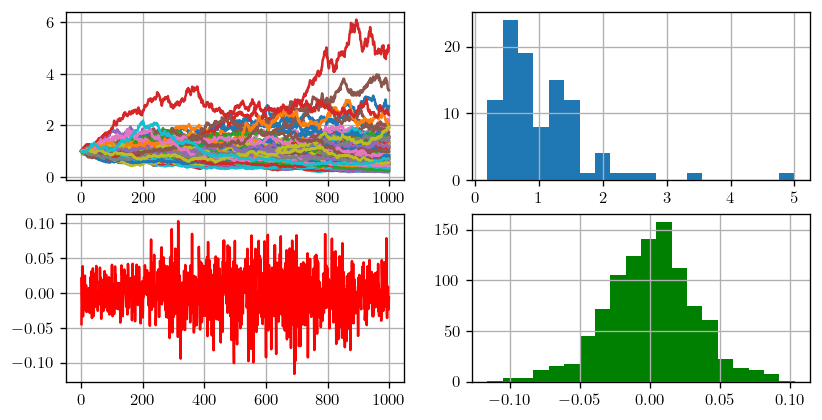

In [5]:
r = multiplicative_model()   
fin = r[-1,:]
print(100*len(fin[fin<1])/len(fin), '% below average')
make_plots(r)


In [6]:
def exponential_model(time_steps=1000, agents=100):
    mu, sigma = 0, 0.02
    r = np.random.normal(mu, sigma, size=(time_steps, agents))
    r = np.exp(r)
    r[0,:] = 1
    r = r.cumprod(axis=0)
    return r

3. Exponential models (log Student, log normal)

$$ y_t = y_{t-1}\exp(\epsilon_t)$$

- can be transformed to the standard form of stochastic differential equation 


 $$\log y_t=\log y_{t-1}+\epsilon_t$$

45.0 % below average


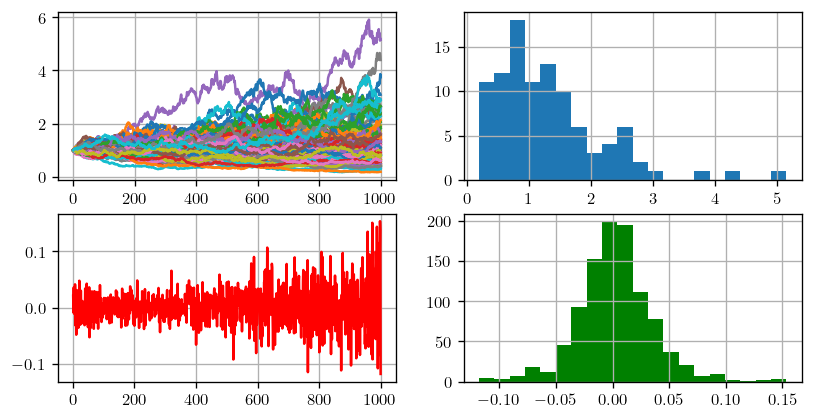

In [7]:
r = exponential_model()   
fin = r[-1,:]
print(100*len(fin[fin<1])/len(fin), '% below average')
make_plots(r)

### Realizations
* Mandelbrott (1963): stock market doesn't follow the normal distribution
* Clark (1973): volatility is driven by information.<br> 
$\epsilon_t$ is drawn from distributions with different $\sigma_t$
* Taylor (1982) - volatility clustering (autocorrelation) 
$$\epsilon_t = W_t+a_1\epsilon_{t-1}+a_2\epsilon_{t-2}+a_3\epsilon_{t-3}+\cdots$$
* Hull, White (1987):
$$d\sigma^2=\alpha(t)dt + \omega(t)dW$$

### Autoregressive models

$AR(p)$ - autoregressive model of a order $p$ is a model where the value at time $t$ is a _linear_ function of previous $p$ values:

$$y_t = c+\beta_1y_{t-1}+\beta_2y_{t-2} + \beta_3y_{t-3} + \cdots \beta_py_{t-p} + \epsilon_t$$

Often the backshift or lag operator $B_sy_t = y_{t-s}$is used then $AR(p)$ model can be written in a more concise form

$$B_0y_t=c+\sum_{i=1}^p\beta_iB_iy_t+\epsilon_t$$
or even 

$$\beta(B)y_t=c+\epsilon_t$$

The last expression can be used to test if the residuals have appropriate statistical properties i.e. $\epsilon_t$ is a white noise

In [8]:
def generate_AR_series(𝛽, c, scale=0.1,  nsamples=200):
    y = np.empty(nsamples)    
    y[0] = 0
    for n in range(1, nsamples):
        y[n] = c + 𝛽*y[n-1] + np.random.normal(scale = scale)
    return (np.arange(nsamples), y)

def show_AR_examples():
    for n, parameters in enumerate([ (0, 0, 0.1), (0, 1, 0.1), (0.03, 1, 0.1), (0.1, 0.9, 0.) ]):
        plt.subplot(2,2,n+1)
        c, 𝛽, scale  = (parameters)
        plt.plot( *generate_AR_series(𝛽, c, scale), f'C{n}', label=f'$c$ = {c}, $\\beta_1=${𝛽}, $\\sigma={scale}$')
        plt.legend()

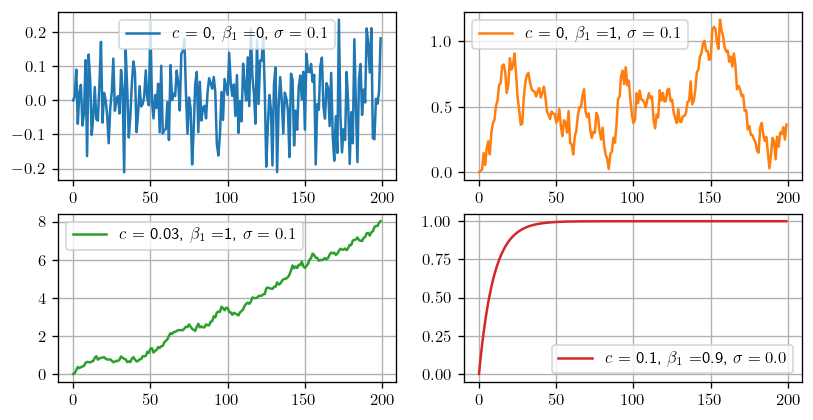

In [9]:
show_AR_examples()

## Option prices - homework
---------------
Black-Scholes-Merton model for European options:
$$C(S_t, K, r, \sigma, T, t) = S_tN(d_1)-Ke^{-r(T-t)}N(d_2)$$


$$d_{1,2} = \frac{1}{\sigma\sqrt{T-t}}\left[\log\left(\frac{S_t}{K}\right) + \left(r-\frac{\sigma^2}{2}\right)(T-t) \right]$$

- $S_t$ - price at time $t$
- $K$ - strike price
- $T$ time to maturity (in years)
- $\sigma$ - volatility
- $N$ cumulative distribution function (CDF) of the standard normal distribution


The equation
$$dS_t = rS_tdt+\sigma S_tdW$$
can be rewritten as
$$\frac{dS_t}{S_t} = rdt+\sigma dW$$
rhs has constant coefficients, so (from Ito's lemma)

$$S_t \approx S_{t-dt}\exp\left[\left(r - \frac{\sigma^2}{2}\right)dt +\sigma \sqrt{dt}W\right]$$

$$C=e^{-rT}E\biggl(\max(S_t-K, 0)\biggr)$$

In [10]:
def heteroskedascicity():
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 2,  1)
    x = np.linspace(0, 10, 1000)
    y = 10+0.4*x
    sig =1+0.1*x**2
    y1 = y + sig
    y2 = y-sig
    plt.title('scale effect')
    plt.plot(x, y, 'black', linestyle='dashed')
    plt.plot(x, y1, 'blue')
    plt.plot(x, y2, 'blue')
    plt.fill_between(x, y1, y2, alpha=0.25)
    plt.xlabel('$x$')
    plt.ylabel('$y$')    
    
    plt.subplot(1, 2,  2)    
    sig =5*np.exp(-0.2*x)
    y1 = y + sig
    y2 = y-sig
    plt.title('learning effect')
    plt.plot(x, y, 'black', linestyle='dashed')
    plt.plot(x, y1, 'green')
    plt.plot(x, y2, 'green')
    plt.fill_between(x, y1, y2, alpha=0.15, color='green')
    plt.xlabel('$x$')
    plt.ylabel('$y$')    
    plt.plot()    

Example:

$$dx = -(a+b^2x)(1-x^2)dt + b(1-x^2)dW$$

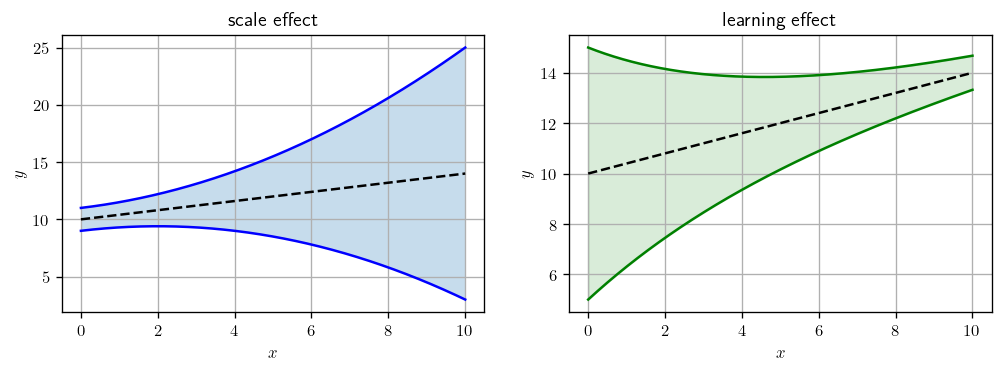

In [11]:
heteroskedascicity()

In [12]:
import sdeint

In [13]:
a = 1.0
b = 0.8
tspan = np.linspace(0.0, 2.0, 5001)
x0 = 0.1

def f(x, t):
    return -(a + x*b**2)*(1 - x**2)

def g(x, t):
    return b*(1 - x**2)

result = sdeint.itoint(f, g, x0, tspan)

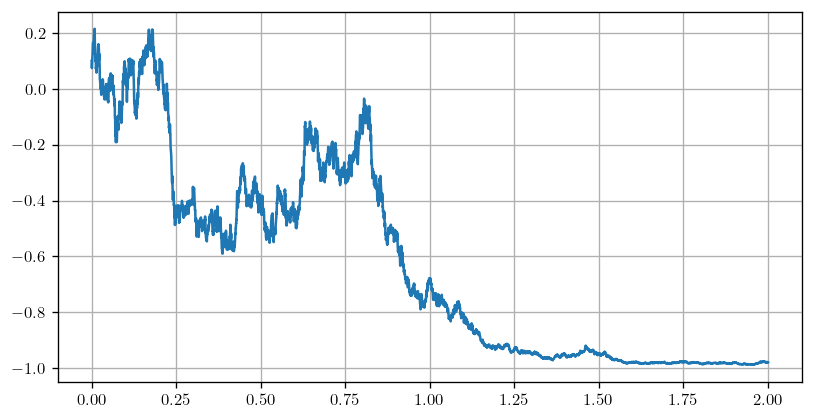

In [14]:
plt.plot(tspan, result)

In [15]:
import pandas as pd

<Axes: >

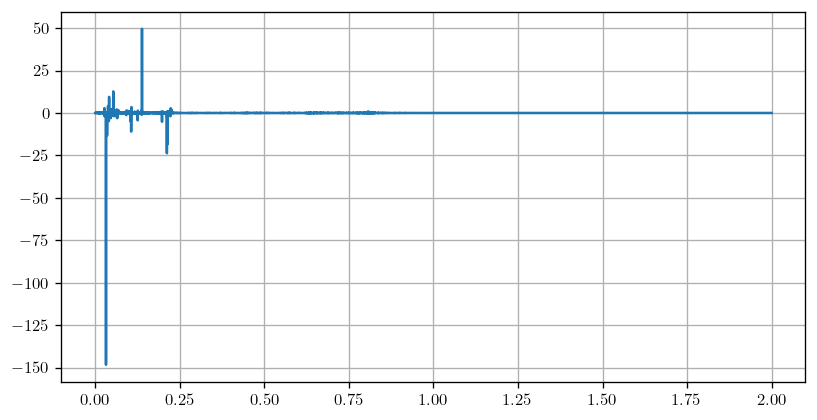

In [16]:
df = pd.DataFrame(result, columns=['X'], index = tspan)
#df.index = tspan
df['returns'] = df.pct_change()
df.returns.plot()

<Axes: >

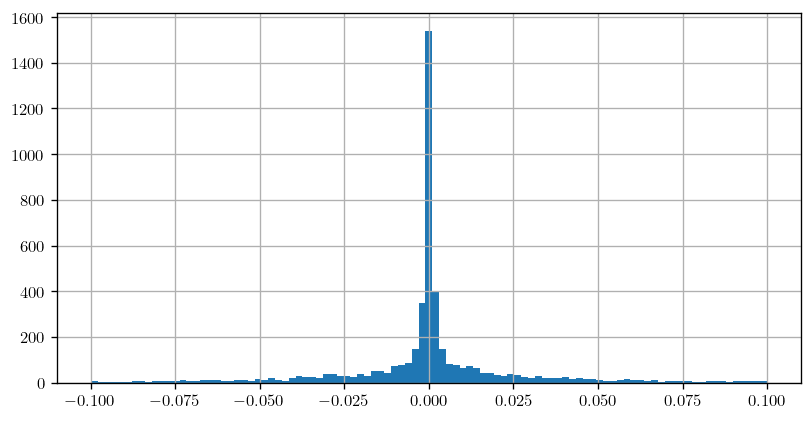

In [17]:
df.returns.hist(bins=np.linspace(-0.1,0.1,100))

## Correlated series

$\vec X\in \mathbb{R}^n$ - vector of independently chosen variables with different distributions

for example $X_i \sim\mathcal{N}(\mu_i,\sigma_i)$.

Independence means: $$\operatorname{cov}(X_i, X_j)=\Sigma_{ij}=E(X_i-\mu_i)E(X_j-\mu_j)=\sigma_i^2\delta_{ij}$$ $$\operatorname{corr}(X_i, X_j)=\frac{E(X_i-\mu_i)E(X_j-\mu_j)}{\sigma_i\sigma_j}\delta_{ij}$$

To simplify let's introduce $Y_i=(X_i-\mu_i)/\sigma_i$.<br><br>
If $A\in\mathbb{R}^{m\times n}$ than $Z=AY$ are $m$ correlated numbers with:

$$\Sigma_{ij}(Z)=E[(AY)_i]E[(AY)_j]=E[A_{ik}Y_k]E[A_{jl}Y_l]=A_{ik}A_{jl}E[Y_k]E[Y_l]$$

But since $E[Y_k]E[Y_l]=\delta_{kl}$<br>

$$\Sigma_{ij}(Z)=A_{ik}A_{jl}\delta_{kl}=A_{il}A_{jl}$$

$$\Sigma(Z)=AA^T$$

Notes:
* $Z$ is a $m$ dimensional series of correlated values
* the covariance matrix is  $AA^T$ where $A$ some transformation matrix 
* $AA^T$ is symmetric and positively defined
* diagonalizing $\Sigma$ we can restore the original independent series
* eigenvalues = variances
* eigenvectors = independent linear combinations of $Z_i$
* important concept: eigenportfolio - independent combinations of assets with different volatilities.


<img src="https://static1.colliderimages.com/wordpress/wp-content/uploads/2022/01/saw-series-lack-of-villains.jpg?q=50&fit=contain&w=1140&h=&dpr=1.5" width=30% />

## Play a game:
[Statistical mechanics of money](https://link.springer.com/article/10.1007/s100510070114), A. Dragulescu, V.M. Yakovenko, Eur. Phys. J. B 17, 723–729 (2000) 

1. Generate $N$ agents and give them all the same amount of <span>\$</span>10,
1. randomly choose two agents and toss a coin which one wins <span>\$</span>1 and which one loses <span>\$</span>1,<br>
if the looser had <span>\$</span>0 the transaction does not take place<br>
use function <tt>np.random.randint</tt>
1. repeat step 2 many, many times

In some arbitrary time units the iteration of a game form $m>0$ can be written as

$$\frac{dP_m}{dt} = \left(P_{m+1}-P_m\right)_{P_m \text{wins}} +  \left(P_{m-1}-P_m\right)_{P_m \text{loses}} + P_0(P_{m-1}-P_{m})_{\textrm{loses to 0}}$$

$$\frac{dP_m}{dt} = P_{m-1}-2P_m + P_{m+1}-P_0(P_{m-1}-P_m)$$

Using continuous variables:

$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}-k\frac{\partial u}{\partial x}$$

Static solution of the above is 

$$u = A-Be^{-kx}, \qquad \int_{0}^\infty u (x)\, dx= 10N$$

$$u = 10kNe^{-kx}$$

Compare with the Boltzmann-Gibbs distribution and find a temperature

$$P_m=\frac{e^{-m/T}}{1-e^{-1/T}}$$

* For $m==0$ there is 0 probability of losing
* For $m>0$ the probability of losing is slightly higher then wining - one can play with $P_0$.
* Evolution of a single agent:

$$X_{t+1} = X_t + dW_t $$


$$
dW_t = \begin{cases}
+1 & \text{with probability}& \frac{N-P_0}{2N}\\
\\
0 & \text{with probability}& \frac{P_0}{2N}\\
\\
-1 & \text{with probability}& \frac12
\end{cases}
$$

Average drift towards 0.

* Without the boundary the distribution was a dissolving gaussian.
* Boundary conditions stabilize the distribution: in reality $k\sim u(0)\sim P_0$ - nonlocal.
* Fairness of the game leads to very uneven distribution with lots of poor and very few very wealthy
* In a fair game no one stays on top too long
* Beware of survival bias: current top was not on top many years ago. There were others. There will be others in 20 years.

# Predator-prey agent model
Two dimensional array. Each pixel can be empty or occupied by a prey or a predator.

* at each time step random cell is picked
 * If the cell is empty then nothing happens
 * if it is occupied then another cell, in the neighborhood, is randomly selected
   - If one cell is occupied by predator and another by prey, then the prey is eaten. 
   - After doing so the predator gives a birth to another predator with a certain probability. 
   - The new predator is placed in the former prey's cell.
   - If both cells are occupied by the same type of agent, then nothing happens.
   - If we have a prey cell and empty cell, then prey gives a birth to another prey with a certain probability.
   - If we have a predator cell and empty cell, then predator dies with a certain probability.
   - If after the application of the rules above still nothing has changed and movement of the agent is possible, then the agent moves from one cell to another unoccupied cell.

## Example of real life distributions

with Pandas dataframes.


Pandas are the most often used dataframe framework (especially in finance), but there are alternatives, sometimes even faster such as Polars, and some others.

At this point it is difficult to tell which framework will dominate in the future.

In [85]:
!pip install yfinance==0.2.40

In [2]:
import pandas as pd
import numpy as np
from functools import reduce
import pandas_datareader.data as web # make sure to have the newest pandas-datareader module installed
import datetime


In [92]:
yfin.__version__

'0.2.66'

In [88]:
!pip freeze

asttokens==3.0.0
beautifulsoup4==4.14.3
certifi==2025.11.12
cffi==2.0.0
charset-normalizer==3.4.4
colorama==0.4.6
comm==0.2.3
contourpy==1.3.2
curl_cffi==0.14.0
cycler==0.12.1
debugpy==1.8.17
decorator==5.2.1
exceptiongroup==1.3.0
executing==2.2.1
fonttools==4.60.1
frozendict==2.4.7
html5lib==1.1
idna==3.11
inflection==0.5.1
ipykernel==7.1.0
ipython==8.37.0
jedi==0.19.2
jupyter_client==8.6.3
jupyter_core==5.9.1
kiwisolver==1.4.9
lxml==6.0.2
matplotlib==3.10.7
matplotlib-inline==0.2.1
more-itertools==10.8.0
mpmath==1.3.0
multitasking==0.0.12
nest-asyncio==1.6.0
numpy==2.2.6
packaging==25.0
pandas==2.3.3
pandas-datareader==0.10.0
parso==0.8.5
peewee==3.18.3
pillow==12.0.0
platformdirs==4.5.0
prompt_toolkit==3.0.52
protobuf==6.33.2
psutil==7.1.2
pure_eval==0.2.3
pycparser==2.23
Pygments==2.19.2
pyparsing==3.2.5
python-dateutil==2.9.0.post0
pytz==2025.2
pyzmq==27.1.0
Quandl==3.7.0
requests==2.32.5
scipy==1.15.3
sdeint==0.3.0
six==1.17.0
soupsieve==2.8.1
stack-data==0.6.3
sympy==1.14.0
torn

In [90]:
del yfin

In [7]:

# to avoid some stupid error
import yfinance as yfin
yfin.pdr_override()

In [4]:
start = datetime.datetime(2009, 12, 30)
end =   datetime.datetime(2023, 11, 30)
df = web.DataReader("GLD","yahoo", start, end)

Failed to get ticker 'GLD' reason: Expecting value: line 1 column 1 (char 0)
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GLD']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-30,106.639999,107.440002,106.400002,106.930000,106.930000,9399600
2009-12-31,107.980003,108.110001,107.239998,107.309998,107.309998,9124700
2010-01-04,109.820000,110.139999,109.309998,109.800003,109.800003,16224100
2010-01-05,109.879997,110.389999,109.260002,109.699997,109.699997,14213100
2010-01-06,110.709999,111.769997,110.410004,111.510002,111.510002,24981900
...,...,...,...,...,...,...
2023-11-22,185.470001,185.720001,184.270004,184.559998,184.559998,4337700
2023-11-24,185.470001,185.750000,185.160004,185.520004,185.520004,2445100
2023-11-27,186.559998,186.800003,185.929993,186.770004,186.770004,6320400


In [10]:
df.loc[:, 'Adj Close']

Date
2009-12-30    106.930000
2009-12-31    107.309998
2010-01-04    109.800003
2010-01-05    109.699997
2010-01-06    111.510002
                 ...    
2023-11-22    184.559998
2023-11-24    185.520004
2023-11-27    186.770004
2023-11-28    189.259995
2023-11-29    189.539993
Name: Adj Close, Length: 3503, dtype: float64

In [9]:
tickers = ["^DJI", "^IXIC", "^GSPC", "^STOXX50E", "^N225", "^GDAXI"]
data = [web.DataReader(ticker, start, end).loc[:, 'Adj Close'] for ticker in tickers]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [11]:
asset_universe = pd.DataFrame(data, index=tickers).T.fillna(method='ffill')

In [25]:
start, end = datetime.datetime(2009, 12, 30), datetime.datetime(2020, 11, 30)

tickers = ["^DJI", "^IXIC", "^GSPC", "^STOXX50E", "^N225", "^GDAXI"]

asset_universe = pd.DataFrame(
    [web.DataReader(ticker, start, end).loc[:, 'Adj Close'] for ticker in tickers],
     index=tickers).T.fillna(method='ffill')

asset_universe = asset_universe/asset_universe.iloc[0, :]  # "normalization" to start from 1

In [26]:
def show_assets_np(n):       
    data = asset_universe[tickers[n]]
    df = np.diff(data)
    var = np.var(df)
    mean = np.mean(df)
    print(f'analysis for {tickers[n]}: {mean:.6f} ± {np.sqrt(var):.6f}') 
    
    plt.figure(figsize=(10, 6), dpi=100)
    plt.subplot(2, 2, (1,2))
    plt.plot(data, 'r')    
    plt.subplot(2, 2, 3)
    plt.plot(range(df.size), df, 'g')
    plt.subplot(2, 2, 4)
    
    plt.hist(df, bins=np.linspace(-0.05, 0.05, 50), density='True', color='C1')
    t = np.linspace(-0.05, 0.05, 500)
    y = 1/np.sqrt(2*np.pi*var)*np.exp(-(t-mean)**2/(2*var))
    plt.plot(t, y, 'black')
    plt.show()

In [69]:
def show_assets(n):       
    data = asset_universe[tickers[n]]
    plt.figure(figsize=(10, 9), dpi=150)
    plt.subplot(3, 2, (1,2))
    data.plot(color='C3')
    plt.subplot(3, 2, 3)
    returns = data.pct_change()
    diff = data.diff()
    diff.plot(color='C2')
    plt.subplot(3, 2, 4)
    diff.hist(bins=np.linspace(-0.05, 0.05, 50), density='True', color='C1')

    log_retrns = np.log(1+returns)
    
    plt.subplot(3, 2, 5)
    log_returns = np.log(1+returns)
    log_returns.plot(color='C4')
    plt.subplot(3, 2, 6)
    log_returns.hist(bins=np.linspace(-0.05, 0.05, 50), density='True', color='C5')    

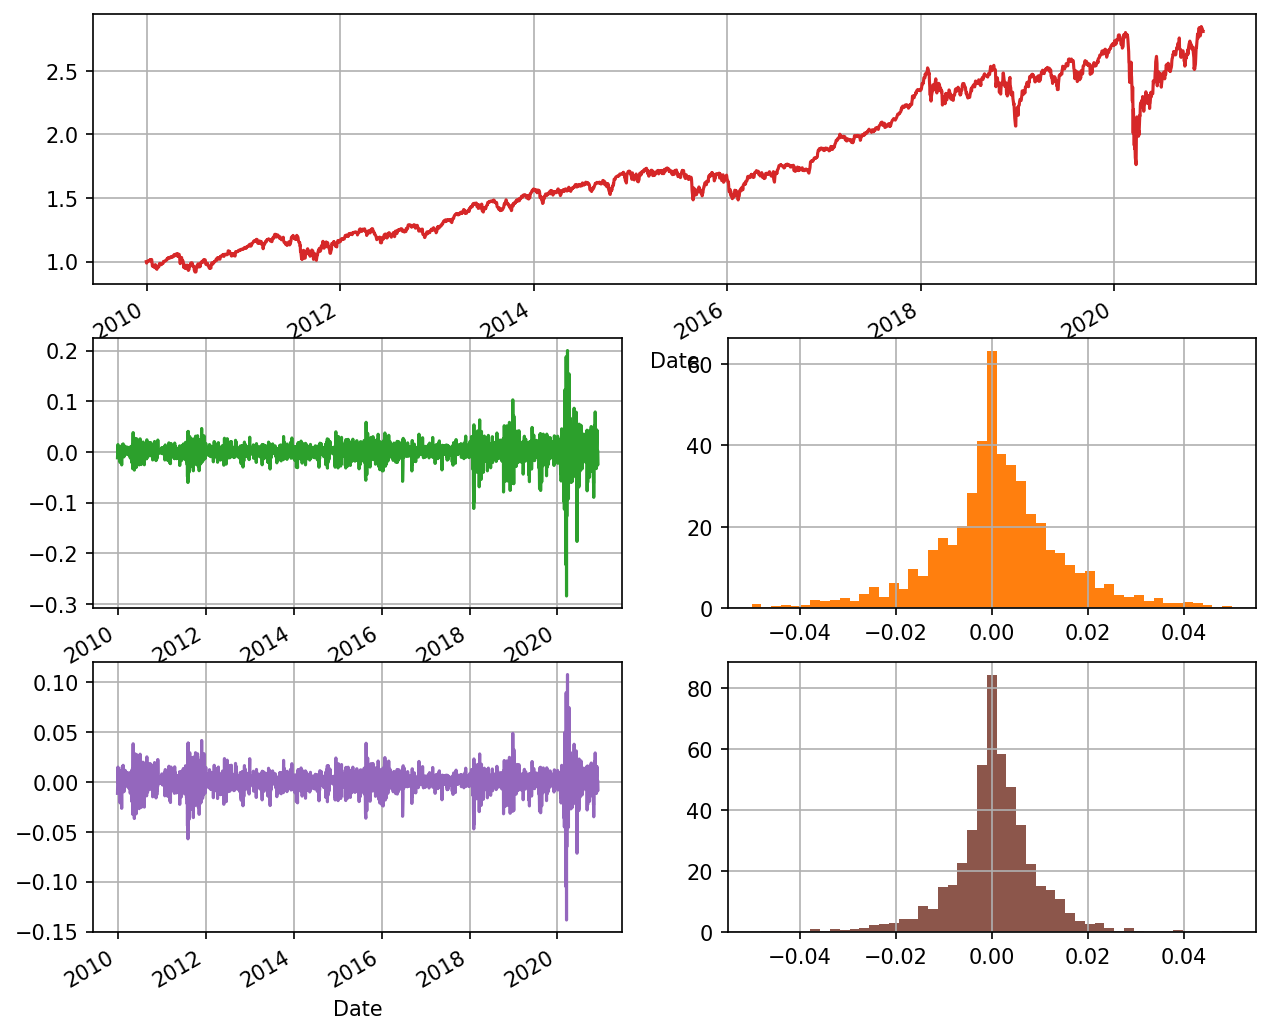

In [71]:
show_assets(0)

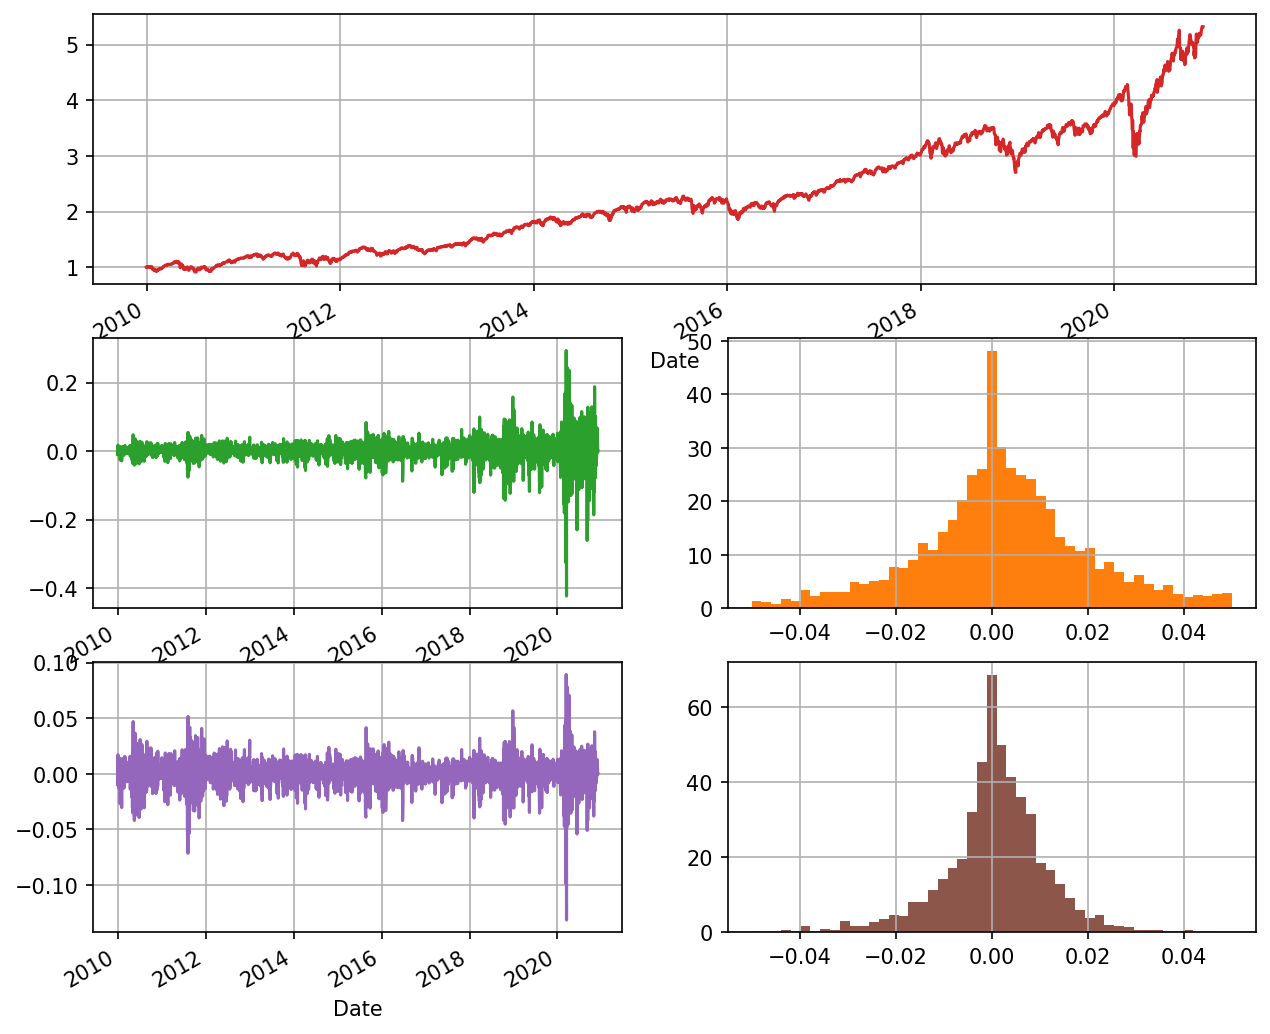

In [73]:
show_assets(1)

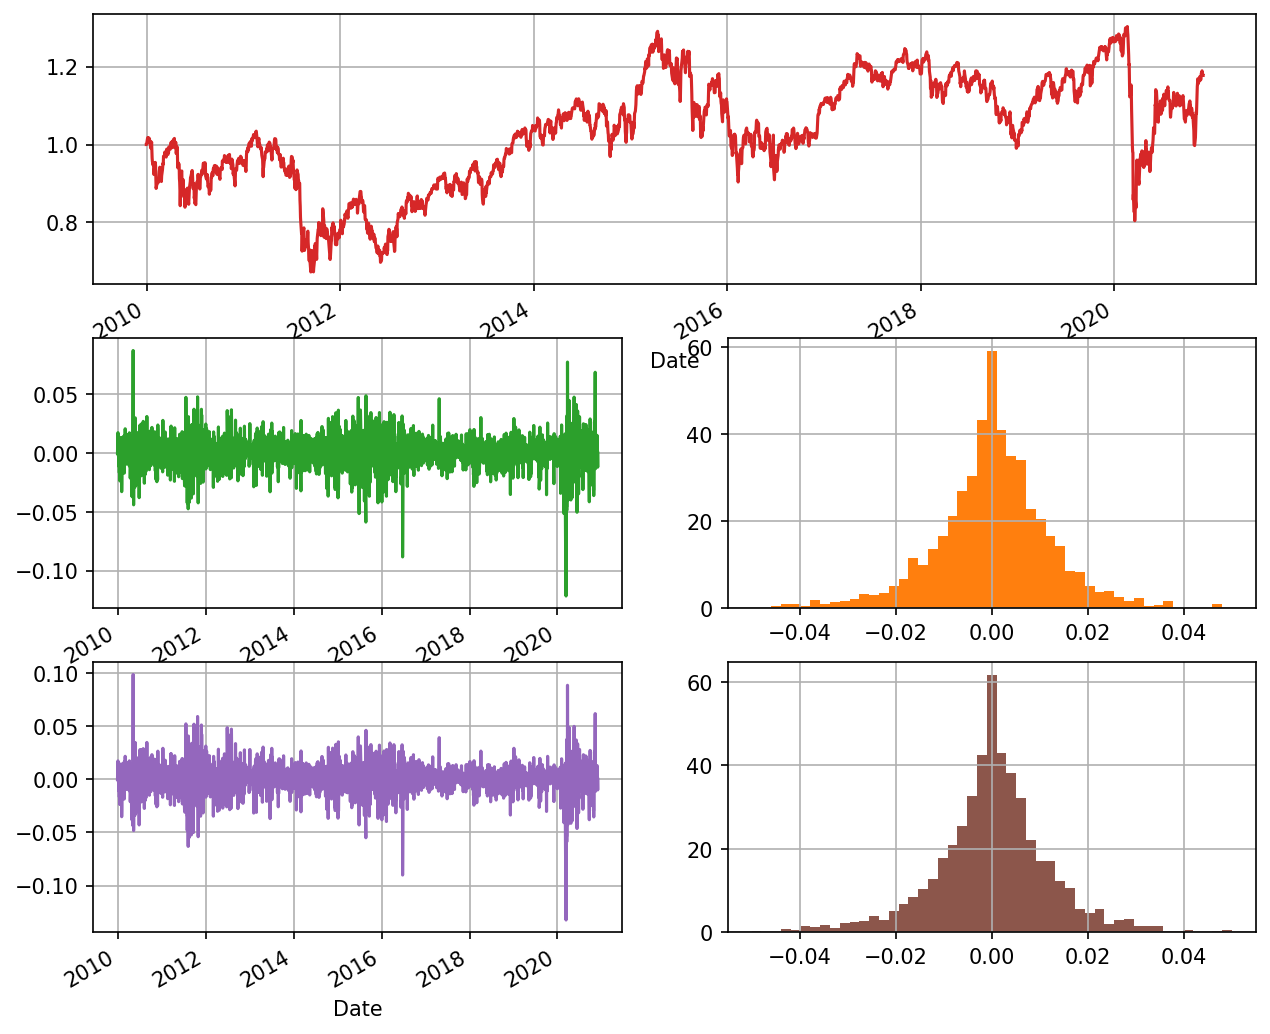

In [74]:
show_assets(3)

Returns (in pandas pct_change()):
$$r_i=\frac{p_i-p_j}{p_j}\,,\qquad j=i-1$$
Usually the prices are log-normally distributed
Log returns:
$$1+r_i=\frac{p_i}{p_j}=\exp\left[\log\left(\frac{p_i}{p_j}\right)\right]$$
Accumulation:
$$(1+r_1)(1+r_2)(1+r_3)\ldots=\prod_{i=1}(1+r_i)$$
But better:
$$\log(1+r_1)+\log(1+r_2)+\log(1+r_3)\ldots=\sum_{i=1}\log(1+r_i)$$

* Log returns should accumulate to normal distribution (central limit theorem)<br><br>
* $\log(1+r_i)\approx r_i$ for $|r_i|\ll1$<br><br>
* Better to compare relative values (returns) rather the absolute values (prices)<br><br>
* Multiplications of numbers close to 1 is worse numerically than addition of small numbers<br><br>
* Volatility = standard deviation or variance (ambiguous conventions) of returns.

#### Conclusion: 
* The distributions are very rarely gaussian.
* Why?
    - different time scales (Central Limit Theorem requires identical independent distributions)
    - higher moments still presents
    - dependence from other assets
    - nonlinear dependence 


### Exercise:
generate brownian motion with one of the distributions obtained from real data.

## Option prices
---------------
Black-Scholes-Merton model for European options:
$$C(S_t, K, r, \sigma, T, t) = S_tN(d_1)-Ke^{-r(T-t)}N(d_2)$$


$$d_{1,2} = \frac{1}{\sigma\sqrt{T-t}}\left[\log\left(\frac{S_t}{K}\right) + \left(r-\frac{\sigma^2}{2}\right)(T-t) \right]$$

- $S_t$ - proce at time $t$
- $K$ - strike price
- $T$ time to maturity (in years)
- $\sigma$ - volatility
- $N$ cumulative distribution function (CDF) of the standard normal distribution


In [78]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [ ]:
import pandas as pd
import pandas_datareader as pd

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/GOOG/history?period1=1420081200&period2=1606791599&interval=1d&frequency=1d&filter=history
Response Text:
b'<html><meta charset=\'utf-8\'>\n<script>\nif(window != window.top){\ndocument.write(\'<p>Content is currently unavailable.</p><img src="//geo.yahoo.com/p?s=1197757039&t=\'\n    + new Date().getTime() + \'&_R=\'\n    + encodeURIComponent(document.referrer)\n    + \'&err=404\'\n    + \'" width="0px" height="0px"/>\');\n}else{\nwindow.location.replace(\'https://\' + window.location.host + \'/?err=404\');\n}\n</script>\n<noscript>\n<META http-equiv="refresh" content="0;URL=https://finance.yahoo.com/?err=404">\n</noscript></html>'

In [13]:

start_date = '2015-01-01'
end_date = '2020-11-30'
#end_date = '2016-01-04'
# fb_data = pdr.DataReader("GOOG","yahoo", start_date, end_date)

fb = yfin.Ticker("GOOG")
fb_data = fb.history(start = start_date, end = end_date, ignore_tz=True) # https://github.com/ranaroussi/yfinance/issues/2001#issuecomment-2485344382

fb_data.tail()

Failed to get ticker 'GOOG' reason: Expecting value: line 1 column 1 (char 0)


TypeError: PriceHistory.history() got an unexpected keyword argument 'ignore_tz'

In [ ]:
!pip uninstall yfinance
!pip install yfinance --upgrade --no-cache-dir

In [19]:
fb_data = yfin.download("GOOG", start=start_date, end=end_date)
fb_data.tail()

Failed to get ticker 'GOOG' reason: Expecting value: line 1 column 1 (char 0)
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GOOG']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [9]:
pdr.__version__

'0.10.0'

In [11]:
yfin.__version__

'0.2.40'

In [13]:
from scipy import stats

def Black_Scholes_call(S_t, K, r, sigma, T):
    den = 1 / (sigma * np.sqrt(T))
    d1 = den * (np.log(S_t / K) + (r + 0.5 * sigma ** 2) * T)
    d2 = den * (np.log(S_t / K) + (r - 0.5 * sigma ** 2) * T)
    C = S_t * stats.norm.cdf(d1) \
        - K * np.exp(-r * T) * stats.norm.cdf(d2)
    return C

In [14]:
# Calculate volatility
# Returns
ret = fb_data['Close'][1:].values / fb_data['Close'][:-1].values - 1
# Volatility
sigma = np.std(ret) * np.sqrt(252)

sigma

0.3194383984777103

In [15]:
# Get the risk-free rate

rfr = pdr.DataReader("DGS10", "fred", end_date)
rfr.head()

,DGS10
DATE,
2020-11-30,0.84
2020-12-01,0.92
2020-12-02,0.95
2020-12-03,0.92
2020-12-04,0.97


In [16]:
# Get the opening price on the day of interest
S_t = fb_data['Open'][-1]
# Range of strike prices
K = S_t *(1 + np.linspace(0.05, 1, 20))
# Risk free rate on day of interest
r = rfr.loc[fb_data.index[-1]][0]
# Time to maturity in year fractions
T = 0.5

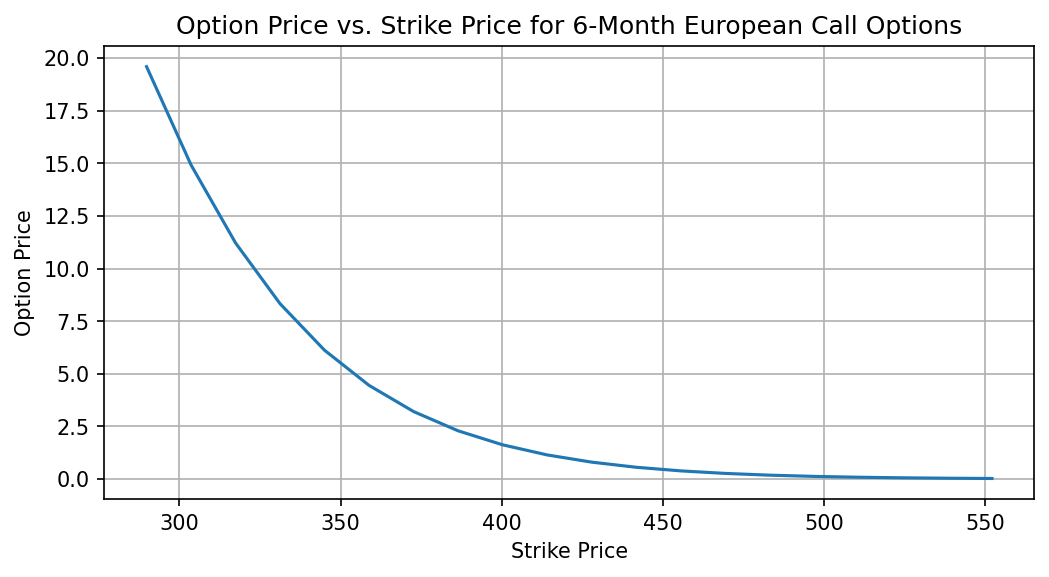

In [17]:
# Calculate option prices
C = [Black_Scholes_call(S_t, k, r / 100, sigma, T) for k in K]

plt.plot(K, C)
plt.xlabel("Strike Price")
plt.ylabel("Option Price")
plt.title("Option Price vs. Strike Price for 6-Month European Call Options")
plt.show()

In [27]:
# Keep values from previous BSM for comparison
K_bsm =  S_t *(1 + 0.05)
C_bsm = Black_Scholes_call(S_t, K_bsm, r / 100, sigma, T)

# Parameters - same values as used in the example above 
# repeated here for a reminder, change as you like
# Initial asset price
S_0 = S_t
# Strike price for call option
K = K_bsm
# Time to maturity in years
T = 0.5
# Risk-free rate of interest
r = rfr.loc[fb_data.index[-1]][0] / 100
# Historical Volatility
sigma = np.std(ret) * np.sqrt(252)
# Number of time steps for simulation
n_steps = int(T * 252)
# Time interval
dt = T / n_steps
# Number of simulations
N = 100000
# Zero array to store values (often faster than appending)
S = np.zeros((n_steps, N))
S[0] = S_0

The equation
$$dS_t = rS_tdt+\sigma S_tdW$$
can be rewritten as
$$\frac{dS_t}{S_t} = rdt+\sigma dW$$
rhs has constant coefficients, so (from Ito's lemma)

$$S_t \approx S_{t-dt}\exp\left[\left(r - \frac{\sigma^2}{2}\right)dt +\sigma \sqrt{dt}W\right]$$

$$C=e^{-rT}E\biggl(\max(S_t-K, 0)\biggr)$$

In [28]:
for t in range(1, n_steps):
    # Draw random values to simulate Brownian motion
    W = np.random.standard_normal(N)
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2)*dt + (sigma * np.sqrt(dt) * W))

# Sum and discount values
C = np.exp(-r * T) * np.mean(np.maximum(S[-1] - K, 0))

In [29]:
def show_BS_example():
    plt.plot(S[:,0:30])
    plt.axhline(K, c="k", xmin=0,
                xmax=n_steps,
               label="Strike Price")
    plt.xlim([0, n_steps])
    plt.ylabel("Non-Discounted Value")
    plt.xlabel("Time step")
    plt.title("First 30 Option Paths")
    plt.legend(loc="best")
    plt.show()

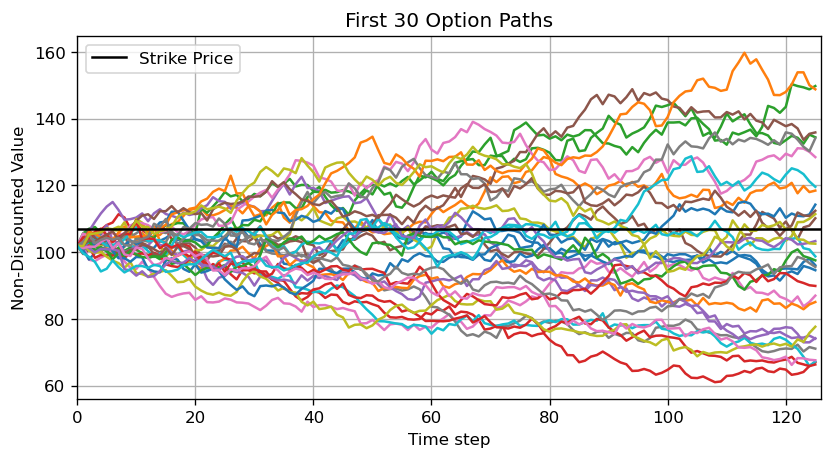

In [30]:
show_BS_example()

# Pandas data types

In [76]:
!pip install quandl


   ---------------------------------------- 0/3 [more-itertools]
   ------------- -------------------------- 1/3 [inflection]
   -------------------------- ------------- 2/3 [quandl]
   -------------------------- ------------- 2/3 [quandl]
   -------------------------- ------------- 2/3 [quandl]
   -------------------------- ------------- 2/3 [quandl]
   -------------------------- ------------- 2/3 [quandl]
   -------------------------- ------------- 2/3 [quandl]
   -------------------------- ------------- 2/3 [quandl]
   -------------------------- ------------- 2/3 [quandl]
   -------------------------- ------------- 2/3 [quandl]
   ---------------------------------------- 3/3 [quandl]



In [31]:
import quandl as qdl

data = qdl.get("WSE/WIG30")
data

,Open,High,Low,Close,% Change,Turnover (1000s)
Date,,,,,,
2016-10-03,1982.01,1997.93,1978.65,1994.76,0.92,447235.01
2016-10-04,1999.99,2029.75,1999.87,2026.20,1.58,788854.18
2016-10-05,2027.49,2042.42,2016.23,2035.46,0.46,779566.16
2016-10-06,2033.05,2036.45,2023.94,2034.34,-0.06,574269.09
2016-10-07,2034.51,2035.05,2022.55,2025.38,-0.44,507426.68
...,...,...,...,...,...,...
2020-12-04,2179.00,2238.98,2179.00,2235.18,3.00,1069432.02
2020-12-07,2237.52,2252.53,2221.48,2248.80,0.61,1632599.51
2020-12-08,2234.71,2267.53,2228.34,2267.53,0.83,1679637.17


In [32]:
type(data)

pandas.core.frame.DataFrame

In [33]:
data.dtypes

Open                float64
High                float64
Low                 float64
Close               float64
% Change            float64
Turnover (1000s)    float64
dtype: object

In [34]:
vars(data)

{'_is_copy': None,
 '_mgr': BlockManager
 Items: Index(['Open', 'High', 'Low', 'Close', '% Change', 'Turnover (1000s)'], dtype='object')
 Axis 1: DatetimeIndex(['2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06',
                '2016-10-07', '2016-10-10', '2016-10-11', '2016-10-12',
                '2016-10-13', '2016-10-14',
                ...
                '2020-11-27', '2020-11-30', '2020-12-01', '2020-12-02',
                '2020-12-03', '2020-12-04', '2020-12-07', '2020-12-08',
                '2020-12-09', '2020-12-10'],
               dtype='datetime64[ns]', name='Date', length=1033, freq=None)
 FloatBlock: slice(0, 6, 1), 6 x 1033, dtype: float64,
 '_item_cache': {},
 '_attrs': {}}

In [35]:
data.columns

Index(['Open', 'High', 'Low', 'Close', '% Change', 'Turnover (1000s)'], dtype='object')

In [36]:
data.index

DatetimeIndex(['2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06',
               '2016-10-07', '2016-10-10', '2016-10-11', '2016-10-12',
               '2016-10-13', '2016-10-14',
               ...
               '2020-11-27', '2020-11-30', '2020-12-01', '2020-12-02',
               '2020-12-03', '2020-12-04', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10'],
              dtype='datetime64[ns]', name='Date', length=1033, freq=None)

In [37]:
data['Open']

Date
2016-10-03    1982.01
2016-10-04    1999.99
2016-10-05    2027.49
2016-10-06    2033.05
2016-10-07    2034.51
               ...   
2020-12-04    2179.00
2020-12-07    2237.52
2020-12-08    2234.71
2020-12-09    2275.93
2020-12-10    2303.04
Name: Open, Length: 1033, dtype: float64

pandas.core.series.Series

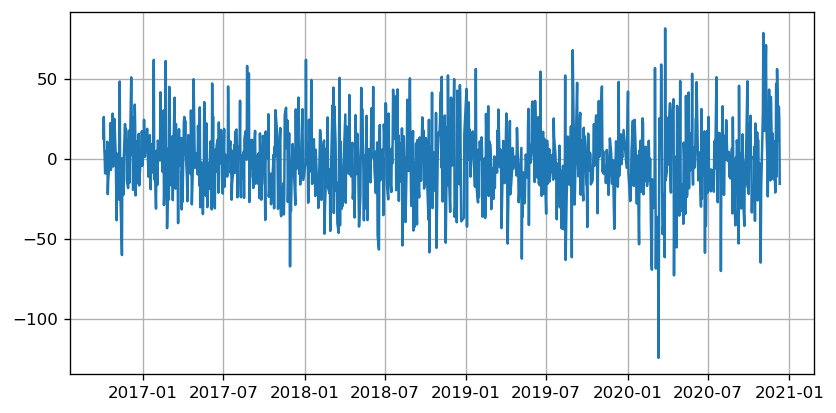

In [38]:
plt.plot(data['Close']-data['Open'])
type(data['Open'])

In [39]:
print(data['Open'].array)

<PandasArray>
[1982.01, 1999.99, 2027.49, 2033.05, 2034.51, 2034.33, 2044.37, 2028.54,
 2028.46, 2013.79,
 ...
  2130.1, 2129.04, 2128.06, 2126.12, 2181.17,  2179.0, 2237.52, 2234.71,
 2275.93, 2303.04]
Length: 1033, dtype: float64


In [40]:
vars(data['Open'])

{'_is_copy': None,
 '_mgr': SingleBlockManager
 Items: DatetimeIndex(['2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06',
                '2016-10-07', '2016-10-10', '2016-10-11', '2016-10-12',
                '2016-10-13', '2016-10-14',
                ...
                '2020-11-27', '2020-11-30', '2020-12-01', '2020-12-02',
                '2020-12-03', '2020-12-04', '2020-12-07', '2020-12-08',
                '2020-12-09', '2020-12-10'],
               dtype='datetime64[ns]', name='Date', length=1033, freq=None)
 FloatBlock: 1033 dtype: float64,
 '_item_cache': {},
 '_attrs': {},
 '_name': 'Open',
 '_index': DatetimeIndex(['2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06',
                '2016-10-07', '2016-10-10', '2016-10-11', '2016-10-12',
                '2016-10-13', '2016-10-14',
                ...
                '2020-11-27', '2020-11-30', '2020-12-01', '2020-12-02',
                '2020-12-03', '2020-12-04', '2020-12-07', '2020-12-08',
                '2020-12

## Tasks:


1. Using Metropolis-Hastings algorithm calculate a volume of $N$-ball.

In [3]:
import numpy as np
from tqdm import tqdm

    Let f(x) be a desired distibution.

    1. choose an initial number $x$
    1. choose a test number $x'=x+W$, where $W$ - random number from a symmetic distribution (usually gaussian)
    1. if $f(x')>f(x)$ accept $x'$ as a new position
    1. if $f(x')<f(x)$ accept $x'$ as the new position only if 
    $$\frac{f(x')}{f(x)}>p$$
    where $p\in [0,1)$ - a random number from a uniform distribution 

In [ ]:
def f(x):
    if np.any(np.abs(x)>1): return 0
    return 1


In [68]:

N = 4
count = 100_000
x = np.zeros(N)
X = []


In [69]:

for i in tqdm(range(count)):
    xprim = x + np.random.normal(0,1,N)

    if f(xprim) / f(x) > np.random.random():
        x = xprim

    X.append(x)


100%|██████████| 100000/100000 [00:03<00:00, 25884.85it/s]


In [71]:
X=np.array(X)
X

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       ...,
       [-0.35359443,  0.56944172, -0.95853876, -0.55746299],
       [-0.35359443,  0.56944172, -0.95853876, -0.55746299],
       [-0.35359443,  0.56944172, -0.95853876, -0.55746299]],
      shape=(100000, 4))

In [72]:
X[np.linalg.norm(X,axis=1)<1]

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       ...,
       [-0.03317605, -0.16415884, -0.0567917 , -0.5005385 ],
       [-0.03317605, -0.16415884, -0.0567917 , -0.5005385 ],
       [-0.03317605, -0.16415884, -0.0567917 , -0.5005385 ]],
      shape=(30775, 4))

In [73]:
volume = X[np.linalg.norm(X,axis=1)<1].shape[0] / count * 2**N
volume

4.924

In [59]:
from scipy.special import gamma

def analytical_volume_n_ball(n: int, R: float = 1.0) -> float:
    """Analytical formula for volume of n-ball with radius R"""
    return (np.pi ** (n/2) / gamma(n/2 + 1)) * (R ** n)
    # copied from a favourite LLM chatbot

In [74]:
volume_anal = analytical_volume_n_ball(N,1)
volume_anal

np.float64(4.934802200544679)

In [75]:
(volume-volume_anal)/volume_anal

np.float64(-0.002188983490257487)

 
1. From some real data (example from lecture) erase 10% of the data and reconstruct the data


1. Implement BS model for other options


1. Find and download options data for some other examples.